In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from scripts.db import *
from scripts.plots import *
from scripts.stats import *
from scripts.statsTransferencia import *
import numpy as np
import statsmodels.api as sm
from scipy.stats import mannwhitneyu

In [2]:
resumen = dataNumerica()

/home/ionatan/Gits/IPyVisound/scripts/statsTransferencia.py:348: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame
  dataByAlias[cts.P_FaseActiva].replace('ExperimentoCompleto', 'TestFinal', inplace=True)
/home/ionatan/Gits/IPyVisound/scripts/statsTransferencia.py:320: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame
  dataByAlias[cts.P_OrientacionEntrenamiento].replace('A30', 'P30', inplace=True)
/home/ionatan/Gits/IPyVisound/scripts/statsTransferencia.py:322: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame
  dataByAlias[cts.P_OrientacionEntrenamiento].replace('P30', 'CONTROL', inplace=True)


Quiero hacer una validacion estadistica de diferentes preguntas. 

Hipotesis:
a) El nivel de convergencia en angulos y en paralelismo es similar. Asumo que no va a dar.

Esta pregunta permite decidir si las escalas de paralelismo y angulos son equivalentes en cuanto a dificultad. 



In [40]:
# Comparamos el conjunto de mediciones en el entrenamiento, separando en la performance entre angulos y paralelismo para ver si son medidas equivalentes de dificultad

performanceEntrenamientoParalelismo = []
performanceEntrenamientoAngulos = []
for user,data in resumen.items():
    if data['Orientacion'] != 'CONTROL':
        if sum (data['EntrenamientoMedio'])>200 :
            if data['Orientacion'] != 'P30':
                performanceEntrenamientoParalelismo = performanceEntrenamientoParalelismo + data['EntrenamientoInicial'][1:4]
                performanceEntrenamientoParalelismo = performanceEntrenamientoParalelismo + data['EntrenamientoMedio'][1:4]
                performanceEntrenamientoParalelismo = performanceEntrenamientoParalelismo + data['EntrenamientoFinal'][1:4]
            else:
                performanceEntrenamientoAngulos = performanceEntrenamientoAngulos + data['EntrenamientoInicial'][1:4]
                performanceEntrenamientoAngulos = performanceEntrenamientoAngulos + data['EntrenamientoMedio'][1:4]
                performanceEntrenamientoAngulos = performanceEntrenamientoAngulos + data['EntrenamientoFinal'][1:4]
    

#display (performanceEntrenamientoParalelismo)
#display (performanceEntrenamientoAngulos)
mannwhitneyu(performanceEntrenamientoParalelismo, performanceEntrenamientoAngulos)

#mannwhitneyu([10,28,38,30,50,80],[0.3,0.1,0.5,0.4,0.6,0.3])

(91.0, 0.012723415730238391)

In [31]:
# Comparamos el conjunto de mediciones en el entrenamiento, separando en la medicion absoluta entre angulos y paralelismo para ver si son medidas equivalentes de dificultad

performanceEntrenamientoParalelismoA = []
performanceEntrenamientoAngulosA = []
for user,data in resumen.items():
    if data['Orientacion'] != 'CONTROL':
        if sum (data['EntrenamientoMedio'])>200 :
            if data['Orientacion'] != 'P30':
                performanceEntrenamientoParalelismoA = performanceEntrenamientoParalelismoA + data['EntrenamientoInicialEnAngulos'][1:4]
                performanceEntrenamientoParalelismoA = performanceEntrenamientoParalelismoA + data['EntrenamientoMedioEnAngulos'][1:4]
                performanceEntrenamientoParalelismoA = performanceEntrenamientoParalelismoA + data['EntrenamientoFinalEnAngulos'][1:4]
            else:
                performanceEntrenamientoAngulosA = performanceEntrenamientoAngulosA + data['EntrenamientoInicialEnAngulos'][1:4]
                performanceEntrenamientoAngulosA = performanceEntrenamientoAngulosA + data['EntrenamientoMedioEnAngulos'][1:4]
                performanceEntrenamientoAngulosA = performanceEntrenamientoAngulosA + data['EntrenamientoFinalEnAngulos'][1:4]
    

#display (performanceEntrenamientoParalelismoA)
#display (performanceEntrenamientoAngulosA)
mannwhitneyu(performanceEntrenamientoParalelismoA, performanceEntrenamientoAngulosA)

(137.0, 0.21889072400389586)

Hacemos los graficos donde lo anterior se vea.

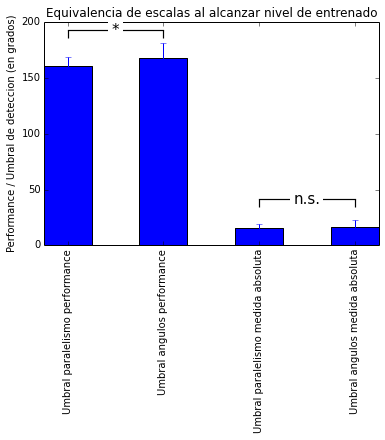

In [30]:
# a bar plot with errorbars
import numpy as np
import matplotlib.pyplot as plt

N = 4
means = (np.mean(performanceEntrenamientoParalelismo), np.mean(performanceEntrenamientoAngulos), np.mean(performanceEntrenamientoParalelismoA), np.mean(performanceEntrenamientoAngulosA))
sds = (np.std(performanceEntrenamientoParalelismo), np.std(performanceEntrenamientoAngulos), np.std(performanceEntrenamientoParalelismoA), np.std(performanceEntrenamientoAngulosA))

ind = np.arange(N)  # the x locations for the groups
width = 0.5       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, means, width, yerr=sds)

# add some text for labels, title and axes ticks
ax.set_ylabel('Performance / Umbral de deteccion (en grados)')
ax.set_title('Equivalencia de escalas al alcanzar nivel de entrenado')
ax.set_xticks(ind + width/2)
ax.set_xticklabels(('Umbral paralelismo performance', 'Umbral angulos performance', 'Umbral paralelismo medida absoluta', 'Umbral angulos medida absoluta') ,rotation='vertical')



from matplotlib.markers import TICKDOWN

def significance_bar(start,end,height,displaystring,linewidth = 1.2,markersize = 8,boxpad  =0.3,fontsize = 15,color = 'k'):
    # draw a line with downticks at the ends
    plt.plot([start,end],[height]*2,'-',color = color,lw=linewidth,marker = TICKDOWN,markeredgewidth=linewidth,markersize = markersize)
    # draw the text with a bounding box covering up the line
    plt.text(0.5*(start+end),height,displaystring,ha = 'center',va='center',bbox=dict(facecolor='1.', edgecolor='none',boxstyle='Square,pad='+str(boxpad)),size = fontsize)

pvals = [0.012,0.218]
offset  = 25

for i,p in enumerate(pvals):
    if p>=0.05:
        displaystring = r'n.s.'
    elif p<0.0001:
        displaystring = r'***'
    elif p<0.001:
        displaystring = r'**'
    else:
        displaystring = r'*'

    height = offset +  max(means[(i*2)],means[i*2+1])
    bar_centers = [ind[(i*2)]+width/2, ind[(i*2+1)]+width/2]
    significance_bar(bar_centers[0],bar_centers[1],height,displaystring)


plt.savefig('./Images/EquivalenciaDeEscalas', bbox_inches='tight')
plt.show()

In [21]:
# Comparamos el conjunto de mediciones en el entrenamiento, separando en la performance entre angulos y paralelismo para ver si son medidas equivalentes de dificultad

performanceEntrenamientoParalelismo = []
performanceEntrenamientoAngulos = []
for user,data in resumen.items():
    if data['Orientacion'] != 'CONTROL':
        if sum (data['EntrenamientoMedio'])>200 :
            if data['Orientacion'] != 'P30':
                performanceEntrenamientoParalelismo = performanceEntrenamientoParalelismo + data['EntrenamientoInicial'][1:4]
                performanceEntrenamientoParalelismo = performanceEntrenamientoParalelismo + data['EntrenamientoMedio'][1:4]
                performanceEntrenamientoParalelismo = performanceEntrenamientoParalelismo + data['EntrenamientoFinal'][1:4]
            else:
                performanceEntrenamientoAngulos = performanceEntrenamientoAngulos + data['EntrenamientoInicial'][1:4]
                performanceEntrenamientoAngulos = performanceEntrenamientoAngulos + data['EntrenamientoMedio'][1:4]
                performanceEntrenamientoAngulos = performanceEntrenamientoAngulos + data['EntrenamientoFinal'][1:4]
    

#display (performanceEntrenamientoParalelismo)
#display (performanceEntrenamientoAngulos)
mannwhitneyu(performanceEntrenamientoParalelismo, performanceEntrenamientoAngulos)

#mannwhitneyu([10,28,38,30,50,80],[0.3,0.1,0.5,0.4,0.6,0.3])

[5.6000000000000005, 12.0, 16.0, 16.0, 19.199999999999999, 17.199999999999999, 14.399999999999999, 14.399999999999999, 19.199999999999999, 16.800000000000001, 13.600000000000001, 19.600000000000001, 16.0, 14.800000000000001, 20.800000000000001, 13.600000000000001, 19.199999999999999, 16.399999999999999]
